# Extract Global Climate Model Datasets from Climate Data Store

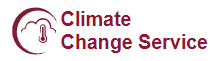

based on this tutorial:  https://ecmwf-projects.github.io/copernicus-training-c3s/projections-cmip6.html



## Import needed libraries

In [9]:
# General libs for file paths, data extraction, etc
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile # To extract zipfiles
import urllib3 
urllib3.disable_warnings() # Disable warnings for data download via API

# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [1]:
## Create an account here https://cds-beta.climate.copernicus.eu/
#login data for CDS BETA
URL='https://cds-beta.climate.copernicus.eu/api'
KEY= '7fe3d4cc-c6c3-4314-8d4a-5a942af4d92f'

"""
# OLD CDS
# Create an account at CDS https://cds.climate.copernicus.eu/#!/home and paste here the URL and your key

URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '317961:c0ffcde2-ed02-41f5-9e32-47c19445f424'
"""

"\n# OLD CDS\n# Create an account at CDS https://cds.climate.copernicus.eu/#!/home and paste here the URL and your key\n\nURL = 'https://cds.climate.copernicus.eu/api/v2'\nKEY = '317961:c0ffcde2-ed02-41f5-9e32-47c19445f424'\n"

## The Climate Data Store includes many climatic datasets: 
https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset
### All of them can be downloaded through the CDS API

## Which parameters do we need for the morphing workflow:

CMIP6 Dataset below
https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form

#### Models and experiments I have downloaded
models = ['access_cm2', 'canesm5', 'taiesm1']

experiments = ['ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']

#### Needed Climate Parameters for the Morphing Workflow:

#### Daily Temperature values:
Near_surface_air_temperature

Daily_maximum_near_surface_air_temperature

Daily minimum near-surface air temperature

#### Monthly values:

relative humidity- 'near_surface_relative_humidity'

atmospheric pressure- 'surface_air_pressure'

wind speed- 'near_surface_wind_speed'

cloud cover

Surface downwelling shortwave radiation

### Go to https://cds-beta.climate.copernicus.eu/datasets/projections-cmip6?tab=download, check the options that you need and copy the API request in the next cell:

In [2]:
import cdsapi

#Example
dataset = "projections-cmip6"
request = {
    'temporal_resolution': 'monthly',
    'experiment': 'ssp1_2_6',
    'variable': 'near_surface_air_temperature',
    'model': 'access_cm2',
    'year': ['2050'],
    'month': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
}

client = cdsapi.Client(url=URL, key=KEY)
client.retrieve(dataset, request).download()

2024-07-22 13:29:29,906 INFO Request ID is 6c0f4328-1101-4077-b594-6fdc250e5a31
2024-07-22 13:29:29,954 INFO status has been updated to accepted
2024-07-22 13:29:31,514 INFO status has been updated to running
2024-07-22 13:29:37,270 INFO status has been updated to successful


4be85ab5e4f2c0a3e968f3adcb8389a3.zip:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

'4be85ab5e4f2c0a3e968f3adcb8389a3.zip'

### Check downloaded dataset

In [11]:
DATADIR = './GLOBAL/'

In [14]:
ds = xr.open_dataset(f'{DATADIR}tas_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_20300101-20501231_v20191108.nc')
ds

<xarray.Dataset> Size: 121MB
Dimensions:    (time: 1096, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 9kB 2030-01-01T12:00:00 ... 2050-12-31T1...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 18kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 121MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-11-08T10:48:29Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/eb81ae3b-30fb-4650-869d-e29b6e76a4e5
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [15]:
temp = ds['tas']
temp.values

array([[[257.28027, 257.2683 , 257.26514, ..., 257.49756, 257.48096,
         257.47363],
        [256.58276, 256.60474, 256.63013, ..., 256.45044, 256.46118,
         256.45776],
        [257.85303, 257.81494, 257.78662, ..., 257.94214, 257.9021 ,
         257.8694 ],
        ...,
        [244.71948, 243.74146, 243.5415 , ..., 245.49829, 245.35376,
         245.18652],
        [245.32104, 244.98022, 244.8628 , ..., 245.42627, 245.40625,
         245.38281],
        [246.25854, 246.14209, 246.24854, ..., 246.12573, 246.13232,
         246.2063 ]],

       [[257.85303, 257.83374, 257.823  , ..., 258.09717, 258.0691 ,
         258.06274],
        [258.0708 , 258.04858, 258.03516, ..., 258.01538, 258.0061 ,
         257.98438],
        [258.7893 , 258.7234 , 258.68896, ..., 259.0327 , 258.94092,
         258.89233],
        ...,
        [244.5083 , 243.45337, 243.16797, ..., 245.2461 , 245.16895,
         245.06763],
        [243.14575, 243.16284, 243.2605 , ..., 243.93604, 243.16455,
   